In [4]:
## importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/stud.csv')## the firt two dot tells to first go up means outside the notebook and then read the data

In [6]:
import os
os.getcwd()

'd:\\End-to-End ML Project\\notebook'

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

Data Checks to Perform

1.check missing value
2.check duplicate value
3.check data type
4.check the number of unique values for each column
5.check statistics of data set
6.check various categories present in the different categorical column

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Observation : There are no missing values

In [10]:
df.duplicated().sum()

np.int64(0)

observation : there are no duplicate values in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


observation : 6 are of object data type and 3 are of int datatype

In [12]:
df.nunique()## hr column mai kitne different yani unique values haii

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight 

1.From above description of numerical data, all means are very close to each other - between 66 and 68.50;
2.All standard deviaions are also close between 14.6 and 15.19;
3.While there is a minimum score 0 for math, for writing is much higher =10  and for reading myet higher = 17



checking the categories

In [15]:
print("categories in 'gender' variable :   ",end=" " )
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable :   ",end=" " )
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variable :   ",end=" " )
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable :   ",end=" " )
print(df['lunch'].unique())

print("categories in 'test prepation course' variable :   ",end=" " )
print(df['test_preparation_course'].unique())



categories in 'gender' variable :    ['female' 'male']
categories in 'race/ethnicity' variable :    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable :    ['standard' 'free/reduced']
categories in 'test prepation course' variable :    ['none' 'completed']


In [17]:
## define numerical and categorical columns

numeric_feature=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']

## print the columns
print('We have {} numerical features : {}'.format(len(numeric_feature),numeric_feature))
print('We have {} categorical features : {}'.format(len(categorical_feature),categorical_feature))




We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
## doing feature engineering as we are going to add the features

df['Total Score']=df['math_score']+df['reading_score'] + df['writing_score']
df['average']=df['Total Score']/3






In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full=df[df['reading_score']==100]['gender'].count()## this shows koi si bhii ek column le skte ho 
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100].count()## this shows agr ek bhi column nhii lii to wo har column ke liye print krega


print(f"Number of students with full marks in Reading : {reading_full}")
print(f"Number of students with full marks in Writing : {writing_full}")
print(f"Number of students with full marks in Maths : {math_full}")



Number of students with full marks in Reading : 17
Number of students with full marks in Writing : 14
Number of students with full marks in Maths : gender                         7
race_ethnicity                 7
parental_level_of_education    7
lunch                          7
test_preparation_course        7
math_score                     7
reading_score                  7
writing_score                  7
Total Score                    7
average                        7
dtype: int64


In [44]:
reading_lessthan20=df[df.reading_score <=20]['average'].count()
writing_lessthan20=df[df['writing_score']<=20]['average'].count()
math_lessthan20=df[df['math_score']<=20]['average'].count()

print(f'No. of students in having reading_score less than 20 markks : {reading_lessthan20}')
print(f'No. of students in having writing_score less than 20 markks : {writing_lessthan20}')
print(f'No. of students in having math_score less than 20 marks : {math_lessthan20}')


No. of students in having reading_score less than 20 markks : 1
No. of students in having writing_score less than 20 markks : 3
No. of students in having math_score less than 20 marks : 4


best performance in reading and worst performance in Maths

VISUALIZATION

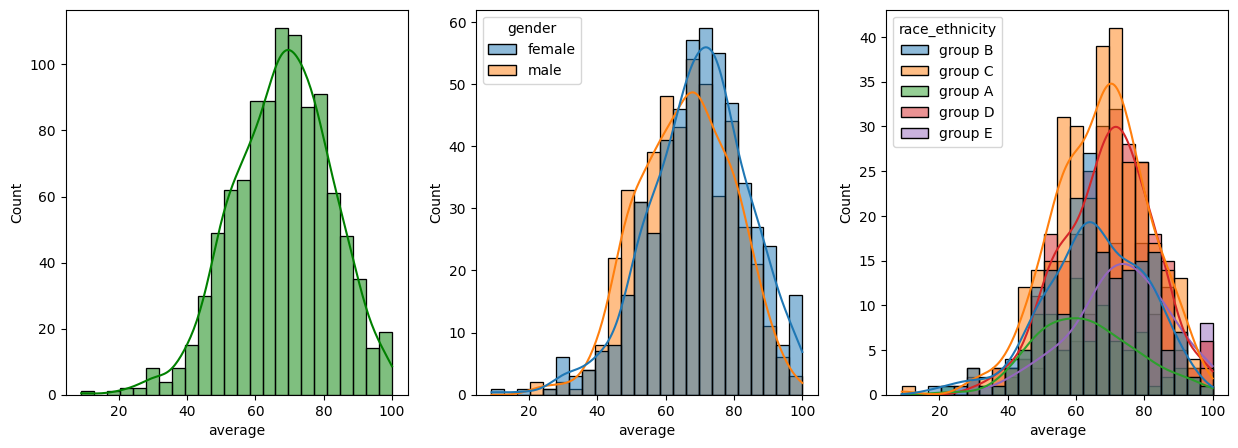

In [42]:
# fig,axs= plt.subplots(1,3,figsize=(15,5))
# plt.subplot(131)
# sns.histplot(data=df,x='average',kde=True,color='g')
# plt.subplot(132)
# sns.histplot(data=df,x='average',kde=True,hue='gender')
# plt.subplot(133)
# sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
# plt.show()


##or directly u can use

fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df, x='average', kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[2])

plt.show()


Observation : from the 1st graph it is clear that the most of the students have scored btw 65 to 70
and 2nd graph shows the female are more in getting higher marks then men.

<Axes: xlabel='average', ylabel='Count'>

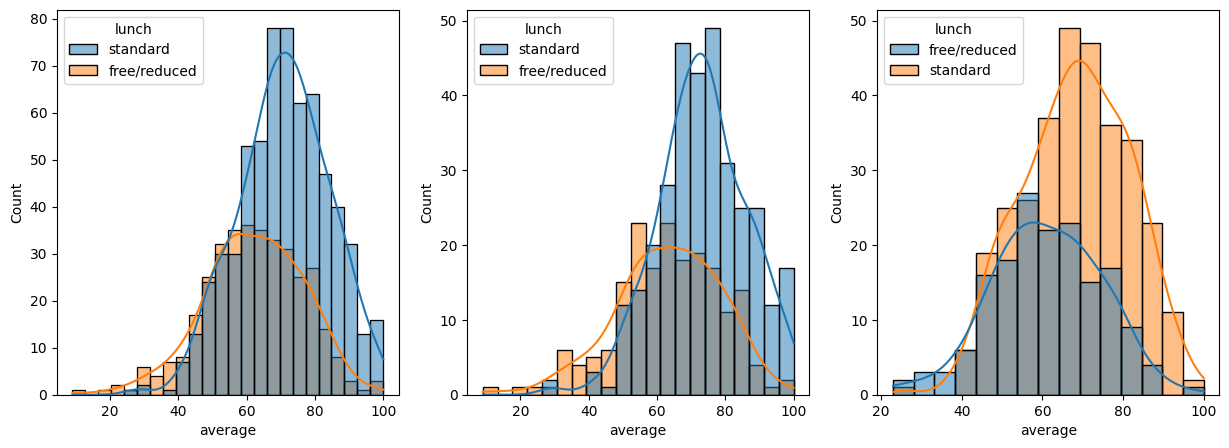

In [47]:

fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', ax=axs[1])
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', ax=axs[2])
